In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

src = cv2.imread(r"C:\Users\user\Downloads\sim20.jpg") 
# Remove noise by blurring with a Gaussian filter
src = cv2.GaussianBlur(src, (3, 3), 0)
kernel = np.ones((5,5), np.uint8)
src = cv2.erode(src, kernel, iterations = 1)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

dst = cv2.Laplacian(gray, cv2.CV_16S, ksize=3)

abs_dst = cv2.convertScaleAbs(dst)

src_hsv_img=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
lower_blue = np.array([110,10,40])
upper_blue = np.array([120,255,255])
    
mask = cv2.inRange(src_hsv_img, lower_blue, upper_blue)
res = cv2.bitwise_and(src_hsv_img,src_hsv_img, mask= mask)

thresh, binary_image = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
all_contours = cv2.drawContours(src.copy(), contours, -1, (0,255,0), 10)

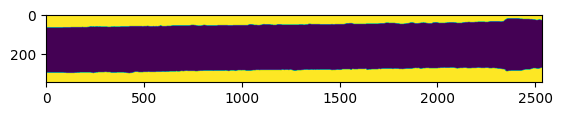

In [50]:
plt.imshow(binary_image)

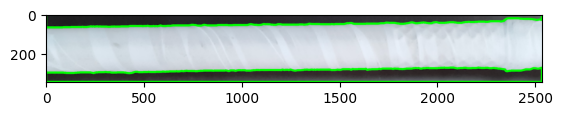

In [51]:
plt.imshow(all_contours)

In [52]:

def check_horizontal_line_contours(contours, threshold_degrees=4, acceptance_threshold=0.85):
    problematic_contours = []

    for contour in contours:
        if len(contour) < 2:
            continue

        # Fit a line to the contour and calculate its angle with the horizontal axis
        vx, vy, _, _ = cv2.fitLine(contour, cv2.DIST_L2, 0, 0.01, 0.01)
        angle_degrees = np.arctan2(vy, vx) * 180 / np.pi

        # Calculate the deviation from the horizontal direction
        deviation = abs(angle_degrees)

        # Check if the deviation is above the threshold or within the acceptance threshold
        if deviation > threshold_degrees:
            problematic_contours.append(contour)
        elif deviation <= threshold_degrees and deviation >= (1 - acceptance_threshold) * threshold_degrees:
            problematic_contours.append(contour)

    return problematic_contours

# Assuming you already have 'contours' from your previous code
problematic_lines = check_horizontal_line_contours(contours)

if problematic_lines:
    print("There is a problem with wiring.")
else:
    print("Wiring looks fine.")


There is a problem with wiring.


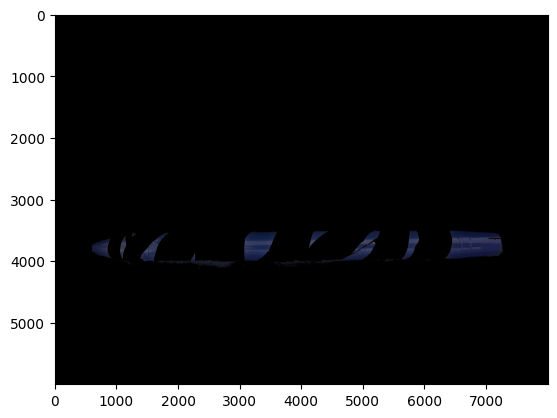

In [53]:
src2 = cv2.imread(r'C:\Users\user\Downloads\20230912_103658.jpg')
src_hsv_img=cv2.cvtColor(src2,cv2.COLOR_BGR2HSV)
lower_blue = np.array([110,10,40])
upper_blue = np.array([120,255,255])
    
mask = cv2.inRange(src_hsv_img, lower_blue, upper_blue)
res = cv2.bitwise_and(src_hsv_img,src_hsv_img, mask= mask)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_HSV2RGB))

In [54]:
image_path_bad = r'C:\Users\user\Downloads\20230912_103658.jpg'
image_path_proper = r"C:\Users\user\Downloads\sim20.jpg"

In [57]:
def check_insulation(image_path):
    start_time = time.time()

    # Read the image and resize if needed
    src2 = cv2.imread(image_path)

    # Convert to HSV
    src_hsv_img = cv2.cvtColor(src2, cv2.COLOR_BGR2HSV)

    # Define the blue color range
    lower_blue = np.array([110, 10, 40])
    upper_blue = np.array([120, 255, 255])

    # Create a mask for the blue color
    mask = cv2.inRange(src_hsv_img, lower_blue, upper_blue)

    # Check if there are blue pixels using numpy
    if cv2.countNonZero(mask) > 0:
        print("There is a problem with the wiring. Insulation not proper.")
    else:
        print("Wiring is fine. Properly insulated.")
    # Print total execution time
    print("Total Execution Time: {:.4f} seconds".format(time.time() - start_time))



In [58]:
check_insulation(image_path_proper)
print('.......')
check_insulation(image_path_bad)

There is a problem with the wiring. Insulation not proper.
Total Execution Time: 0.0150 seconds
.......
There is a problem with the wiring. Insulation not proper.
Total Execution Time: 0.6496 seconds
